# Descriptores <a class="anchor" id="des"></a>

([Volver al inicio](#inicio))

Debemos primero representar las letras proposicionales, las cuales cruzan la información de qué número está en qué casilla:

$OenCasilla_{x,y,n}$ es verdadera sii el número $n$ está en la casilla $(x,y)$

Para hacer la implementación en python, sugerimos usar la clase `Descriptor`, que se encuentra en la librería `Logica`.  Básicamente, lo que hace la codificación es representar un átomo como un solo caracter (es decir, una cadena de longitud 1).

Importamos la clase a partir de la librería:

In [1]:
from Logica import Descriptor

Ahora creamos un descriptor de dos argumentos,  uno para la casilla $(y)$ y uno para los números:

In [2]:
Nx = 16
Ny = 5
Nn = Nx*Ny
X = list(range(Nx))
Y = list(range(Ny))
xt = [0,1,2,3,4,5,6,7,8,9,"A","B","C","D","E","F"]
CaracterenCasilla = Descriptor([Nx, Ny])



Métodos importantes del `Descriptor`:

* P(`lista_valores`): Codifica el cruce de información correspondiente a los valores en `lista_valores` mediante un caracter.
* inv(`caracter`): Decodifica `caracter` en una lista de valores. Esta lista depende del número de argumentos con que se haya inicializado el objeto descriptor. 

### Codificando en un solo caracter

Mediante el método P() podemos crear las codificaciones. A continuación presentaremos cada uno de los caracteres que codifican los cruces de información de que un número $x$ (con $x\in\{0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15\}$) se encuentra en una casilla $(y)$ (donde $y\in\{0, 1,2,3,4\}$):

In [3]:
lista_regla_4 = []

print("Cantidad de átomos en Casillas:", CaracterenCasilla.rango[1] - CaracterenCasilla.rango[0])
print("Caracteres correspondientes a los átomos en Casillas:\n")
for x in range(Nx):
    for y in range(Ny):
        atomo = CaracterenCasilla.P([x,y])
        print(f"Que el número {xt[x]} está en la casilla ({Y[y]}) es el átomo {atomo}")
        lista_regla_4.append(atomo)
    print("")

Cantidad de átomos en Casillas: 80
Caracteres correspondientes a los átomos en Casillas:

Que el número 0 está en la casilla (0) es el átomo Ā
Que el número 0 está en la casilla (1) es el átomo Đ
Que el número 0 está en la casilla (2) es el átomo Ġ
Que el número 0 está en la casilla (3) es el átomo İ
Que el número 0 está en la casilla (4) es el átomo ŀ

Que el número 1 está en la casilla (0) es el átomo ā
Que el número 1 está en la casilla (1) es el átomo đ
Que el número 1 está en la casilla (2) es el átomo ġ
Que el número 1 está en la casilla (3) es el átomo ı
Que el número 1 está en la casilla (4) es el átomo Ł

Que el número 2 está en la casilla (0) es el átomo Ă
Que el número 2 está en la casilla (1) es el átomo Ē
Que el número 2 está en la casilla (2) es el átomo Ģ
Que el número 2 está en la casilla (3) es el átomo Ĳ
Que el número 2 está en la casilla (4) es el átomo ł

Que el número 3 está en la casilla (0) es el átomo ă
Que el número 3 está en la casilla (1) es el átomo ē
Que el

# Visualización <a class="anchor" id="comp"></a>

Visualización del problema:

In [41]:
from itertools import combinations
from Logica import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from types import MethodType
xt = [0,1,2,3,4,5,6,7,8,9,"A","B","C","D","E","F"]

def escribir_rejilla(self, literal):
    if '-' in literal:
        atomo = literal[1:]
        neg = ' no'
    else:
        atomo = literal
        neg = ''
    x, y  = self.inv(atomo)
    return f"El número {xt[x]}{neg} está en la casilla ({Y[y]})"

class Rejilla:

    '''
    Clase para representar el problema de poner
    un número distinto en cada una de las casillas
    de una rejilla nxn
    '''

    def __init__(self):
        self.Nx = 16
        self.Ny = 5
        self.Nn = self.Nx*self.Ny
        self.X = list(range(self.Nx))
        self.Y = list(range(self.Ny))
        self.CaracterenCasilla = Descriptor([self.Nx, self.Ny])
        r1 = self.regla1()
        r2 = self.regla2()
        r3 = self.regla3()
        r6 = self.regla6()
        r7 = self.regla7()
        self.reglas = [r1, r2, r3, r6, r7]
        
    def regla1(self):
        formula1 = ''
        formulaF = ''
        inicial2 = True
        from Logica import visualizar_formula

        for x in self.X:
            for y in self.Y:
                inicial = True
                otras_casillas = [(j) for j in self.Y if (j) != (y)]
                for casilla in otras_casillas:
                    u = casilla
                    if inicial:
                        formula1 = self.CaracterenCasilla.P([x,u])
                        inicial = False
                    else:
                        formula1 = "(" + formula1 + "O" + self.CaracterenCasilla.P([x,u]) + ")"

                if inicial2:
                    formulaF = "(" + self.CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")"
                    inicial2 = False
                else:
                    formulaF = "(" + formulaF + "Y" +"(" + self.CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")" + ")"

                
                    
    def regla2(self):
        y = 0
        casilla = (y)
        otras_casillas = [(j) for j in self.Y if (j) != (y)]
        hexadecimal = [11,12,13,14,15]
        formula2 = ''
        inicial = True
        for num in hexadecimal:
            for casilla in otras_casillas:
                u = casilla
                if inicial:
                    formula2 = self.CaracterenCasilla.P([num,u])
                    inicial = False
                else:
                    formula2 = "(" + formula2 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def regla3(self):
        y = 0
        casilla = y
        pares = [2,4,6,8,10,12,14]
        formula3 = ''
        inicial = True
        for num in pares:
            u = casilla
            if inicial:
                formula3 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula3 = "(" + formula3 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def regla6(self):
        y = 3
        casilla = y
        primos = [2,3,5,7,11,13]
        formula6 = ''
        inicial = True
        for num in primos:
            u = casilla
            if inicial:
                formula6 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula6 = "(" + formula6 + "O" + self.CaracterenCasilla.P([num,u]) + ")"

                
    def regla7(self):
        y = 4
        casilla = y
        compuestos = [4,6,8,9,10,12,14,15]
        formula7 = ''
        inicial = True
        for num in compuestos:
            u = casilla
            if inicial:
                formula7 = self.CaracterenCasilla.P([num,u])
                inicial = False
            else:
                formula7 = "(" + formula7 + "O" + self.CaracterenCasilla.P([num,u]) + ")"
                
    def visualizar(self, I):
        fig, axes = plt.subplots()
        N = 5
        M = 1
        fig.set_size_inches(N, M)
        step_x = 1. / N
        step_y = 1. / M
        offset = 0.001
        tangulos = []
        tangulos.append(patches.Rectangle((0, 0), 1, 1, \
        facecolor='cornsilk', edgecolor='black', linewidth=2))
        u = N // 2 if N % 2 == 0 else N // 2 + 1  # Filas par o impar
        v = M // 2 if M % 2 == 0 else M // 2 + 1
        for i in range(u + 1):
            for j in range(v):
                # Verificar si la posición está dentro de las primeras 5 celdas
                if i * 2 < 5:
                    tangulos.append(patches.Rectangle((2 * i * step_x, 2 * j * step_y), \
                                                      step_x - offset, step_y, \
                                                      facecolor='lightslategrey', \
                                                      ec='k', lw=3))
                    tangulos.append(patches.Rectangle((step_x + 2 * i * step_x, (2 * j + 1) * step_y), \
                                                      step_x - offset, step_y, \
                                                      facecolor='lightslategrey', \
                                                      ec='k', lw=3))
        for t in tangulos:
            axes.add_patch(t)
        offsetX = 0.065
        offsetY = 0.065
        for k in I:
            X, Y = self.CaracterenCasilla.inv(k)
            if I[k]:
                # Verificar si la posición está dentro de las primeras 5 celdas
                if Y * step_x < 5 * step_x:
                    axes.text(Y * step_x + step_x / 2, 0 * step_y + step_y / 2, xt[X], \
                              ha="center", va="center", size=30, c='k')
        axes.axis('off')
        plt.show()

### Decodificando el caracter

Ahora podemos incluir un método para visualizar más fácilmente la información que porta cada letra proposicional. Esto es, en nuestro ejemplo en cuestión, nuestro objeto `OenCasilla` representa el cruce de información de que un número se encuentra en un lugar. Entonces, al decodificar una letra proposicional, queremos que nos presente claramente esta información y no un caracter inpronunciable (aunque es precisamente este caracter el que usará la máquina). 

Para ello podemos usar el siguiente método `escribir`: 

In [5]:
def escribir(self, literal):
    if '-' in literal:
        atomo = literal[1:]
        neg = ' no'
    else:
        atomo = literal
        neg = ''
    x, y  = self.inv(atomo)
    return f"El número {xt[x]}{neg} está en la casilla ({Y[y]})"
    
from types import MethodType

CaracterenCasilla.escribir = MethodType(escribir, CaracterenCasilla)

In [6]:
atomo = CaracterenCasilla.P([12,1])
print(f"El caracter que codifica es {atomo}")
print("\nSu decodificación es:")
CaracterenCasilla.escribir(atomo)

El caracter que codifica es Ĝ

Su decodificación es:


'El número C está en la casilla (1)'

Este método también toma en cuenta si el literal es positivo o negativo:

In [7]:
CaracterenCasilla.escribir( '-' + atomo)

'El número C no está en la casilla (1)'

# Implementación de restricciones <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear las reglas que limitarán los valores de verdad para las letras proposicionales. En nuestro problema de ejemplo tenemos tres restricciones:

1. Un número sólo está en una casilla.
2. No hay más de un número en una casilla.
3. Debe haber por lo menos un número en una casilla.

### REGLA 1

La fórmula para representar que Para todo carácter x, si x está en la posición y, entonces no puede estar en ninguna otra posición. 

$$CenP_{x,y} \to \neg\left(\bigvee_{(j)\neq (y)} CenP_{x,j}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [7]:


formula1 = ''
formulaF = ''
inicial2 = True
from Logica import visualizar_formula

for x in X:
    for y in Y:
        inicial = True
        otras_casillas = [(j) for j in Y if (j) != (y)]
        for casilla in otras_casillas:
            u = casilla
            if inicial:
                formula1 = CaracterenCasilla.P([x,u])
                inicial = False
            else:
                formula1 = "(" + formula1 + "O" + CaracterenCasilla.P([x,u]) + ")"

        if inicial2:
            formulaF = "(" + CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")"
            inicial2 = False
        else:
            formulaF = "(" + formulaF + "Y" +"(" + CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")" + ")"

        
print("--------------------------------------------------PASO 3 CODIFICADA---------------------------------------------------------")
print("")
print(formulaF)
print("")

formula1 = formulaF


--------------------------------------------------PASO 3 CODIFICADA---------------------------------------------------------

((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((Ā>-(((ĐOĠ)Oİ)Oŀ))Y(Đ>-(((ĀOĠ)Oİ)Oŀ)))Y(Ġ>-(((ĀOĐ)Oİ)Oŀ)))Y(İ>-(((ĀOĐ)OĠ)Oŀ)))Y(ŀ>-(((ĀOĐ)OĠ)Oİ)))Y(ā>-(((đOġ)Oı)OŁ)))Y(đ>-(((āOġ)Oı)OŁ)))Y(ġ>-(((āOđ)Oı)OŁ)))Y(ı>-(((āOđ)Oġ)OŁ)))Y(Ł>-(((āOđ)Oġ)Oı)))Y(Ă>-(((ĒOĢ)OĲ)Oł)))Y(Ē>-(((ĂOĢ)OĲ)Oł)))Y(Ģ>-(((ĂOĒ)OĲ)Oł)))Y(Ĳ>-(((ĂOĒ)OĢ)Oł)))Y(ł>-(((ĂOĒ)OĢ)OĲ)))Y(ă>-(((ēOģ)Oĳ)OŃ)))Y(ē>-(((ăOģ)Oĳ)OŃ)))Y(ģ>-(((ăOē)Oĳ)OŃ)))Y(ĳ>-(((ăOē)Oģ)OŃ)))Y(Ń>-(((ăOē)Oģ)Oĳ)))Y(Ą>-(((ĔOĤ)OĴ)Oń)))Y(Ĕ>-(((ĄOĤ)OĴ)Oń)))Y(Ĥ>-(((ĄOĔ)OĴ)Oń)))Y(Ĵ>-(((ĄOĔ)OĤ)Oń)))Y(ń>-(((ĄOĔ)OĤ)OĴ)))Y(ą>-(((ĕOĥ)Oĵ)OŅ)))Y(ĕ>-(((ąOĥ)Oĵ)OŅ)))Y(ĥ>-(((ąOĕ)Oĵ)OŅ)))Y(ĵ>-(((ąOĕ)Oĥ)OŅ)))Y(Ņ>-(((ąOĕ)Oĥ)Oĵ)))Y(Ć>-(((ĖOĦ)OĶ)Oņ)))Y(Ė>-(((ĆOĦ)OĶ)Oņ)))Y(Ħ>-(((ĆOĖ)OĶ)Oņ)))Y(Ķ>-(((ĆOĖ)OĦ)Oņ)))Y(ņ>-(((ĆOĖ)OĦ)OĶ)))Y(ć>-(((ėOħ)Oķ)OŇ)))Y(ė>-(((ćOħ)Oķ)OŇ)))Y(ħ>-(((ćOė)Oķ)OŇ)))Y(ķ>-(((ćOė)Oħ)OŇ)))Y(Ň>-(((ćOė)Oħ)Oķ

Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [9]:
from Logica import visualizar_formula

print(visualizar_formula(formula1, CaracterenCasilla))

((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((El número 0 está en la casilla (0) >  no (((El número 0 está en la casilla (1) O El número 0 está en la casilla (2)) O El número 0 está en la casilla (3)) O El número 0 está en la casilla (4))) Y (El número 0 está en la casilla (1) >  no (((El número 0 está en la casilla (0) O El número 0 está en la casilla (2)) O El número 0 está en la casilla (3)) O El número 0 está en la casilla (4)))) Y (El número 0 está en la casilla (2) >  no (((El número 0 está en la casilla (0) O El número 0 está en la casilla (1)) O El número 0 está en la casilla (3)) O El número 0 está en la casilla (4)))) Y (El número 0 está en la casilla (3) >  no (((El número 0 está en la casilla (0) O El número 0 está en la casilla (1)) O El número 0 está en la casilla (2)) O El número 0 está en la casilla (4)))) Y (El número 0 está en la casilla (4) >  no (((El número 0 está en la casilla (0) O El número 0 está en la casilla (1)) O El número 

### REGLA 2

Existe un carácter x en la posición y, tal que x∈Letras={A,B,C,D,E,F}⊆Hexadecimales. 

$$CenP_{x,y} \to \neg\left(\bigvee_{n€Letras} CenP_{n,y}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:


In [8]:
y = 0
casilla = (y)
otras_casillas = [(j) for j in Y if (j) != (y)]
hexadecimal = [11,12,13,14,15]
formula2 = ''
inicial = True
for num in hexadecimal:
    for casilla in otras_casillas:
        u = casilla
        if inicial:
            formula2 = CaracterenCasilla.P([num,u])
            inicial = False
        else:
            formula2 = "(" + formula2 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula2)

(((((((((((((((((((ěOī)OĻ)Oŋ)OĜ)OĬ)Oļ)OŌ)Oĝ)Oĭ)OĽ)Oō)OĞ)OĮ)Oľ)OŎ)Oğ)Oį)OĿ)Oŏ)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [11]:
from Logica import visualizar_formula

print(visualizar_formula(formula2, CaracterenCasilla))

(((((((((((((((((((El número B está en la casilla (1) O El número B está en la casilla (2)) O El número B está en la casilla (3)) O El número B está en la casilla (4)) O El número C está en la casilla (1)) O El número C está en la casilla (2)) O El número C está en la casilla (3)) O El número C está en la casilla (4)) O El número D está en la casilla (1)) O El número D está en la casilla (2)) O El número D está en la casilla (3)) O El número D está en la casilla (4)) O El número E está en la casilla (1)) O El número E está en la casilla (2)) O El número E está en la casilla (3)) O El número E está en la casilla (4)) O El número F está en la casilla (1)) O El número F está en la casilla (2)) O El número F está en la casilla (3)) O El número F está en la casilla (4))


### REGLA 3

Para todo carácter x, si x está en la posición 0, entonces x∈Pares={0,2,4,6,8,A,C,E}.

$$CenP_{x,0} \to \left(\bigwedge_{n€Pares} CenP_{n,0}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [9]:
y = 0
casilla = y
pares = [2,4,6,8,10,12,14]
formula3 = ''
inicial = True
for num in pares:
    u = casilla
    if inicial:
        formula3 = CaracterenCasilla.P([num,u])
        inicial = False
    else:
        formula3 = "(" + formula3 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula3)

((((((ĂOĄ)OĆ)OĈ)OĊ)OČ)OĎ)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [13]:
from Logica import visualizar_formula

print(visualizar_formula(formula3, CaracterenCasilla))

((((((El número 2 está en la casilla (0) O El número 4 está en la casilla (0)) O El número 6 está en la casilla (0)) O El número 8 está en la casilla (0)) O El número A está en la casilla (0)) O El número C está en la casilla (0)) O El número E está en la casilla (0))


### REGLA 4

Para todo carácter x, si x está en la posición 2, entonces x∈Multiplos3={1,3,6,9,C,F}.

$$CenP_{x,1} \to \left(\bigwedge_{n€Multiplos} CenP_{n,1}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [10]:
y = 1
casilla = y
multiplos = [1,3,6,9,12,15]
formula4 = ''
inicial = True
for num in multiplos:
    u = casilla
    if inicial:
        formula4 = CaracterenCasilla.P([num,u])
        inicial = False
    else:
        formula4 = "(" + formula4 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula4)

(((((đOē)OĖ)Oę)OĜ)Oğ)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [15]:
from Logica import visualizar_formula

print(visualizar_formula(formula4, CaracterenCasilla))

(((((El número 1 está en la casilla (1) O El número 3 está en la casilla (1)) O El número 6 está en la casilla (1)) O El número 9 está en la casilla (1)) O El número C está en la casilla (1)) O El número F está en la casilla (1))


### REGLA 5

Para todo carácter x, si x está en la posición 2, entonces x∈Impares={1,3,5,7,9,11,13,15}.

$$CenP_{x,2} \to \left(\bigwedge_{n€Impares} CenP_{n,2}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [11]:
y = 2
casilla = y
impares = [1,3,5,7,9,11,13,15]
formula5 = ''
inicial = True
for num in impares:
    u = casilla
    if inicial:
        formula5 = CaracterenCasilla.P([num,u])
        inicial = False
    else:
        formula5 = "(" + formula5 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula5)

(((((((ġOģ)Oĥ)Oħ)Oĩ)Oī)Oĭ)Oį)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [17]:
from Logica import visualizar_formula

print(visualizar_formula(formula5, CaracterenCasilla))

(((((((El número 1 está en la casilla (2) O El número 3 está en la casilla (2)) O El número 5 está en la casilla (2)) O El número 7 está en la casilla (2)) O El número 9 está en la casilla (2)) O El número B está en la casilla (2)) O El número D está en la casilla (2)) O El número F está en la casilla (2))


### REGLA 6

Para todo carácter x, si x está en la posición 3, entonces x∈Primos={2,3,5,7,B,D}.

$$CenP_{(x,3)} \to \left(\bigwedge_{n€Primos} CenP_{(n,3)}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [12]:
y = 3
casilla = y
primos = [2,3,5,7,11,13]
formula6 = ''
inicial = True
for num in primos:
    u = casilla
    if inicial:
        formula6 = CaracterenCasilla.P([num,u])
        inicial = False
    else:
        formula6 = "(" + formula6 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula6)

(((((ĲOĳ)Oĵ)Oķ)OĻ)OĽ)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [19]:
from Logica import visualizar_formula

print(visualizar_formula(formula6, CaracterenCasilla))

(((((El número 2 está en la casilla (3) O El número 3 está en la casilla (3)) O El número 5 está en la casilla (3)) O El número 7 está en la casilla (3)) O El número B está en la casilla (3)) O El número D está en la casilla (3))


### REGLA 7

Para todo carácter x, si x está en la posición 4, entonces x∈Compuestos={4,6,8,9,A,C,E,F}.

$$CenP_{x,4} \to \left(\bigwedge_{n€Compuestos} CenP_{n,4}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [13]:
y = 4
casilla = y
compuestos = [4,6,8,9,10,12,14,15]
formula7 = ''
inicial = True
for num in compuestos:
    u = casilla
    if inicial:
        formula7 = CaracterenCasilla.P([num,u])
        inicial = False
    else:
        formula7 = "(" + formula7 + "O" + CaracterenCasilla.P([num,u]) + ")"


print(formula7)

(((((((ńOņ)Oň)Oŉ)OŊ)OŌ)OŎ)Oŏ)


Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [21]:
from Logica import visualizar_formula

print(visualizar_formula(formula7, CaracterenCasilla))

(((((((El número 4 está en la casilla (4) O El número 6 está en la casilla (4)) O El número 8 está en la casilla (4)) O El número 9 está en la casilla (4)) O El número A está en la casilla (4)) O El número C está en la casilla (4)) O El número E está en la casilla (4)) O El número F está en la casilla (4))


### REGLA 8

Para todo carácter x, si x está en la posición y, entonces no puede haber otro x que este en la posicion y .

$$CenP_{x,y} \to \left(\bigvee_{(n)\neq (x)} CenP_{n,y}\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

In [14]:
formula1 = ''
formulaF = ''
inicial2 = True

for x in X:
    for y in Y:
        
        inicial = True
        for m in X:
            if m != x:
                if inicial:
                    formula1 = CaracterenCasilla.P([m,y])
                    inicial = False
                else:
                    formula1 = "(" + formula1 + "O" + CaracterenCasilla.P([m,y]) + ")"

        if inicial2:
            formulaF = "(" + CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")"
            inicial2 = False
        else:
            formulaF = "(" + formulaF + "Y" +"(" + CaracterenCasilla.P([x,y]) + ">-" + formula1 + ")" + ")"

formula8 = formulaF
print(formula8)

((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((Ā>-((((((((((((((āOĂ)Oă)OĄ)Oą)OĆ)Oć)OĈ)Oĉ)OĊ)Oċ)OČ)Oč)OĎ)Oď))Y(Đ>-((((((((((((((đOĒ)Oē)OĔ)Oĕ)OĖ)Oė)OĘ)Oę)OĚ)Oě)OĜ)Oĝ)OĞ)Oğ)))Y(Ġ>-((((((((((((((ġOĢ)Oģ)OĤ)Oĥ)OĦ)Oħ)OĨ)Oĩ)OĪ)Oī)OĬ)Oĭ)OĮ)Oį)))Y(İ>-((((((((((((((ıOĲ)Oĳ)OĴ)Oĵ)OĶ)Oķ)Oĸ)OĹ)Oĺ)OĻ)Oļ)OĽ)Oľ)OĿ)))Y(ŀ>-((((((((((((((ŁOł)OŃ)Oń)OŅ)Oņ)OŇ)Oň)Oŉ)OŊ)Oŋ)OŌ)Oō)OŎ)Oŏ)))Y(ā>-((((((((((((((ĀOĂ)Oă)OĄ)Oą)OĆ)Oć)OĈ)Oĉ)OĊ)Oċ)OČ)Oč)OĎ)Oď)))Y(đ>-((((((((((((((ĐOĒ)Oē)OĔ)Oĕ)OĖ)Oė)OĘ)Oę)OĚ)Oě)OĜ)Oĝ)OĞ)Oğ)))Y(ġ>-((((((((((((((ĠOĢ)Oģ)OĤ)Oĥ)OĦ)Oħ)OĨ)Oĩ)OĪ)Oī)OĬ)Oĭ)OĮ)Oį)))Y(ı>-((((((((((((((İOĲ)Oĳ)OĴ)Oĵ)OĶ)Oķ)Oĸ)OĹ)Oĺ)OĻ)Oļ)OĽ)Oľ)OĿ)))Y(Ł>-((((((((((((((ŀOł)OŃ)Oń)OŅ)Oņ)OŇ)Oň)Oŉ)OŊ)Oŋ)OŌ)Oō)OŎ)Oŏ)))Y(Ă>-((((((((((((((ĀOā)Oă)OĄ)Oą)OĆ)Oć)OĈ)Oĉ)OĊ)Oċ)OČ)Oč)OĎ)Oď)))Y(Ē>-((((((((((((((ĐOđ)Oē)OĔ)Oĕ)OĖ)Oė)OĘ)Oę)OĚ)Oě)OĜ)Oĝ)OĞ)Oğ)))Y(Ģ>-((((((((((((((ĠOġ)Oģ)OĤ)Oĥ)OĦ)Oħ)OĨ)Oĩ)OĪ)Oī)OĬ)Oĭ)OĮ)Oį)))Y(Ĳ>-((((((((((((((İOı)Oĳ)OĴ)Oĵ)OĶ)Oķ)Oĸ)OĹ)Oĺ)OĻ)Oļ)OĽ)Oľ)OĿ)))Y(ł>-((((((((((((((ŀOŁ)OŃ)O

Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

In [15]:
from Logica import visualizar_formula

print(visualizar_formula(formula8, CaracterenCasilla))

((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((El número 0 está en la casilla (0) >  no ((((((((((((((El número 1 está en la casilla (0) O El número 2 está en la casilla (0)) O El número 3 está en la casilla (0)) O El número 4 está en la casilla (0)) O El número 5 está en la casilla (0)) O El número 6 está en la casilla (0)) O El número 7 está en la casilla (0)) O El número 8 está en la casilla (0)) O El número 9 está en la casilla (0)) O El número A está en la casilla (0)) O El número B está en la casilla (0)) O El número C está en la casilla (0)) O El número D está en la casilla (0)) O El número E está en la casilla (0)) O El número F está en la casilla (0))) Y (El número 0 está en la casilla (1) >  no ((((((((((((((El número 1 está en la casilla (1) O El número 2 está en la casilla (1)) O El número 3 está en la casilla (1)) O El número 4 está en la casilla (1)) O El número 5 está en la casilla (1)) O El número 6 está en la casilla (1)) O El número 7 

# Implementación de Tablas De Verdad <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear utilizar las reglas que creamos para el desarrollo de sus modelos y empezaremos con el metodo de tablas de verdad:


In [38]:
from itertools import product
 
#Creamos una función que nos retorne la lista de interpretaciones según la cantidad de atomos en la formula

def interpretaciones_totales(formula):
        I=[True,False]
        atomos=formula.letras()
        cantidad=len(atomos) #Cantidad de atomos
        interpretaciones=list(product(I, repeat=cantidad))
        return interpretaciones

#Creamos una función que nos retorne una lista con los modelos 

def modelos(formula):
    intepretaciones=interpretaciones_totales(formula)
    model=[] #Lista con los modelos
    atomos=formula.letras()
    cantidad=len(atomos) #Cantidad de atomos
    atomos=sorted(list(atomos)) #Atomos organizados
    
    for I in intepretaciones:
        interpretacion={}
        for i in range(0,cantidad):
            interpretacion[atomos[i]]=I[i] #Le asignamos a cada atomo un valor de verdad
        resultado=formula.valor(interpretacion)
        if resultado==True:
            return interpretacion #Si la interpretación es verdad, entonces se agrega a la lista de modelos
    if model==[]:
        return "No hay modelos"
    else:
        return "Los modelos son: " + str(model)


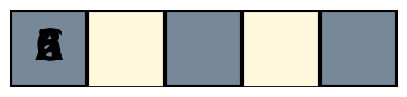

In [43]:
t3 = inorder_to_tree(formula3)
t3 = modelos(t3)

r = Rejilla()
r.visualizar(t3)

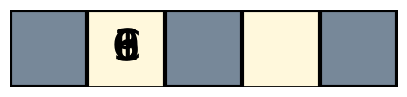

In [44]:
t4 = inorder_to_tree(formula4)
t4 = modelos(t4)

r = Rejilla()
r.visualizar(t4)

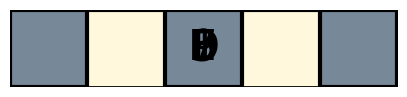

In [45]:
t5 = inorder_to_tree(formula5)
t5 = modelos(t5)

r = Rejilla()
r.visualizar(t5)

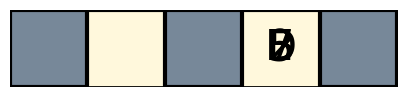

In [46]:
t6 = inorder_to_tree(formula6)
t6 = modelos(t6)

r = Rejilla()
r.visualizar(t6)

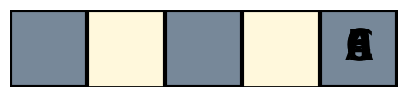

In [47]:
t7 = inorder_to_tree(formula7)
t7 = modelos(t7)

r = Rejilla()
r.visualizar(t7)

# Implementación de AD-SOLVER SAT TABLEUX <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear utilizar las reglas que creamos para el desarrollo de sus modelos y empezaremos con el metodo de tableux:


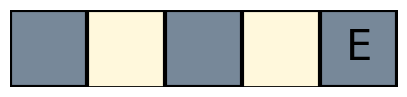

In [21]:
from Logica import *

A= inorder_to_tree(formula1)
A = A.SATtableaux()


r = Rejilla()
r.visualizar(A[1])



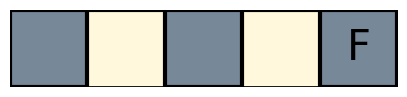

In [119]:
from Logica import *

B= inorder_to_tree(formula2)
B = B.SATtableaux()



r = Rejilla()
r.visualizar(B[1])

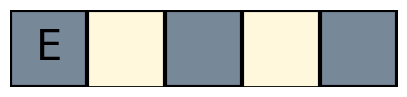

In [120]:
from Logica import *

C= inorder_to_tree(formula3)
C= C.SATtableaux()
r = Rejilla()
r.visualizar(C[1])

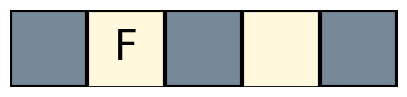

In [121]:
from Logica import *

D= inorder_to_tree(formula4)
D = D.SATtableaux()
r = Rejilla()
r.visualizar(D[1])

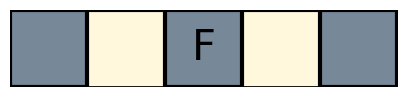

In [124]:
from Logica import *

E= inorder_to_tree(formula5)
E= E.SATtableaux()

r = Rejilla()
r.visualizar(E[1])

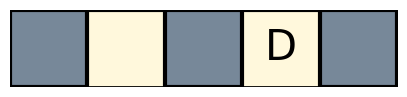

In [125]:
from Logica import *

F= inorder_to_tree(formula6)
F= F.SATtableaux()

r = Rejilla()
r.visualizar(F[1])

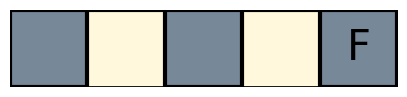

In [126]:
from Logica import *

G = inorder_to_tree(formula7)
G= G.SATtableaux()

r = Rejilla()
r.visualizar(G[1])

In [22]:
from Logica import *

H = inorder_to_tree(formula8)
H= H.SATtableaux()

r = Rejilla()
r.visualizar(H[1])

KeyboardInterrupt: 

In [16]:
from Logica import *

Itoria_formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7,formula8]

Itoria_formulas = Ytoria(Itoria_formulas)

Itoria_formulas = inorder_to_tree(Itoria_formulas)

I_final = Itoria_formulas.SATtableaux()

r = Rejilla()
r.visualizar(I_final[1])

KeyboardInterrupt: 

# Implementación de AD-SOLVER DPLL <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear utilizar las reglas que creamos para el desarrollo de sus modelos y seguiremos con DPLL:


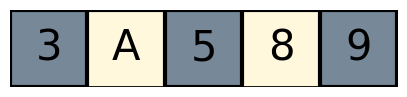

In [137]:
from Logica import *

S1 = tseitin(Ytoria([formula1,formula8]))
S1,I1 = dpll(S1,{})

r = Rejilla()
r.visualizar(I1)



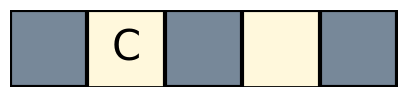

In [138]:
from Logica import *

S2 = tseitin(formula2)
S2,I2 = dpll(S2,{})

r = Rejilla()
r.visualizar(I2)


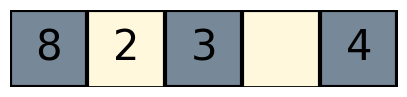

In [152]:
from Logica import *

Ytoria3 = Ytoria([formula3,formula8])
S3 = tseitin(Ytoria3)

S3,I3 = dpll(S3,{})

r = Rejilla()
r.visualizar(I3)

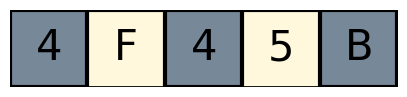

In [153]:
from Logica import *

Ytoria4 = Ytoria([formula4,formula8])
S4 = tseitin(Ytoria4)

S4,I4 = dpll(S4,{})

r = Rejilla()
r.visualizar(I4)

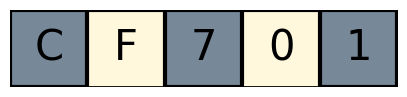

In [155]:
from Logica import *

S5 = tseitin(Ytoria([formula5,formula1,formula8]))
S5,I5 = dpll(S5,{})

r = Rejilla()
r.visualizar(I5)

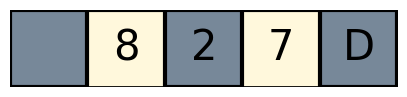

In [158]:
from Logica import *

S6 = tseitin(Ytoria([formula6,formula8]))
S6,I6 = dpll(S6,{})

r = Rejilla()
r.visualizar(I6)

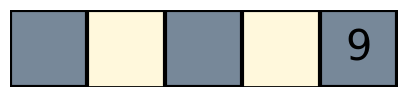

In [89]:
from Logica import *

S7 = tseitin(formula7)
S7,I7 = dpll(S7,{})

r = Rejilla()
r.visualizar(I7)

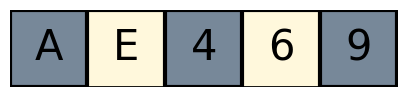

In [90]:
from Logica import *

S8 = tseitin(formula8)
S8,I8 = dpll(S8,{})

r = Rejilla()
r.visualizar(I8)

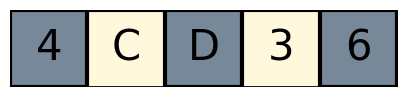

In [207]:
from Logica import *


Itoria_formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7,formula8]
Itoria_formulas = Ytoria(Itoria_formulas)


Sf = tseitin(Itoria_formulas)

Sf,If = dpll(Sf,{})
r = Rejilla()
r.visualizar(If)

# Implementación de AD-SOLVER WALKSAT <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear utilizar las reglas que creamos para el desarrollo de sus modelos y seguiremos con WALKSAT:

In [ ]:
from Logica import *

W1 = tseitin(formula1)
walkSAT(W1)

KeyboardInterrupt: 

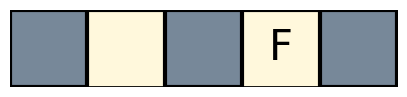

In [101]:
from Logica import *

W2 = tseitin(formula2)
W2 = walkSAT(W2)

r = Rejilla()
r.visualizar(W2[1])

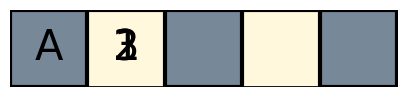

In [177]:
from Logica import *

W3 = tseitin(formula3)
W3 = walkSAT(W3)

r = Rejilla()
r.visualizar(W3[1])


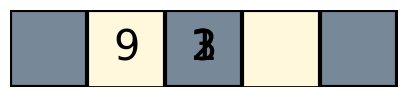

In [171]:
from Logica import *

W4 = tseitin(formula4)
W4 = walkSAT(W4)

r = Rejilla()
r.visualizar(W4[1])

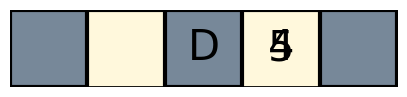

In [190]:
from Logica import *

W5 = tseitin(formula5)
W5 = walkSAT(W5)

r = Rejilla()
r.visualizar(W5[1])

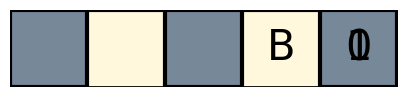

In [194]:
from Logica import *

W6 = tseitin(formula6)
W6= walkSAT(W6)

r = Rejilla()
r.visualizar(W6[1])

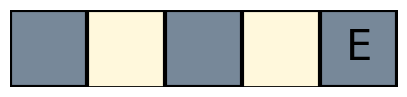

In [195]:
from Logica import *

W7 = tseitin(formula7)
W7 = walkSAT(W7)

r = Rejilla()
r.visualizar(W7[1])

In [17]:
from Logica import *

W8 = tseitin(formula8)
W8 = walkSAT(W8)

r = Rejilla()
r.visualizar(W8[1])

KeyboardInterrupt: 

In [18]:
Itoria_formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7,formula8]
Itoria_formulas = Ytoria(Itoria_formulas)


Wf = tseitin(Itoria_formulas)

Wf = walkSAT(Wf)
r = Rejilla()
r.visualizar(Wf[1])

KeyboardInterrupt: 

# Implementación de AD-SOLVER MINISAT <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear utilizar las reglas que creamos para el desarrollo de sus modelos y seguiremos con MINISAT:

In [196]:
from pysat.solvers import Solver, Minisat22

def SATsolver(A):
    
    def lit_numero(l):
        if '-' in l:
            return -ord(l[1:]) + 256
        else:
            return ord(l) - 256
    
    def clausula_numero(C):
        return [lit_numero(l) for l in C]

    def fnc_numero(S):
        return [clausula_numero(C) for C in S]

    def obtener_int(mod):
        return {chr(256 + abs(n)):n>0 for n in mod}
        
    S = tseitin(A)
    S = fnc_numero(S)
    with Minisat22(bootstrap_with=S) as m:
        if m.solve():
            return 'Satisfacible', obtener_int(m.get_model())
        else:
            return 'Insatisfacible', {}

{'ā': False, 'Ă': False, 'ă': False, 'Ą': False, 'ą': False, 'Ć': False, 'ć': False, 'Ĉ': False, 'ĉ': False, 'Ċ': False, 'ċ': False, 'Č': False, 'č': False, 'Ď': True, 'ď': False, 'Đ': False, 'đ': False, 'Ē': False, 'ē': False, 'Ĕ': False, 'ĕ': False, 'Ė': False, 'ė': False, 'Ę': False, 'ę': False, 'Ě': False, 'ě': True, 'Ĝ': False, 'ĝ': False, 'Ğ': False, 'ğ': True, 'Ġ': False, 'ġ': False, 'Ģ': False, 'ģ': False, 'Ĥ': False, 'ĥ': False, 'Ħ': False, 'ħ': False, 'Ĩ': False, 'ĩ': False, 'Ī': False, 'ī': False, 'Ĭ': False, 'ĭ': False, 'Į': False, 'į': True, 'İ': False, 'ı': False, 'Ĳ': False, 'ĳ': False, 'Ĵ': False, 'ĵ': False, 'Ķ': False, 'ķ': False, 'ĸ': False, 'Ĺ': False, 'ĺ': False, 'Ļ': False, 'ļ': False, 'Ľ': True, 'ľ': False, 'Ŀ': False, 'ŀ': False, 'Ł': False, 'ł': False, 'Ń': False, 'ń': False, 'Ņ': False, 'ņ': False, 'Ň': False, 'ň': False, 'ŉ': False, 'Ŋ': False, 'ŋ': False, 'Ō': False, 'ō': False, 'Ŏ': False, 'ŏ': True, 'Ő': True, 'ő': True, 'Œ': True, 'œ': True, 'Ŕ': True, 'ŕ

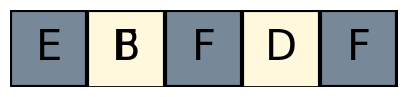

In [31]:
from Logica import *
from pysat.solvers import Solver, Minisat22


def SATsolver(A):
    
    def lit_numero(l):
        if '-' in l:
            return -ord(l[1:]) + 256
        else:
            return ord(l) - 256
    
    def clausula_numero(C):
        return [lit_numero(l) for l in C]

    def fnc_numero(S):
        return [clausula_numero(C) for C in S]

    def obtener_int(mod):
        return {chr(256 + abs(n)):n>0 for n in mod}
        
    S = tseitin(A)
    S = fnc_numero(S)
    with Minisat22(bootstrap_with=S) as m:
        if m.solve():
            return 'Satisfacible', obtener_int(m.get_model())
        else:
            return 'Insatisfacible', {}

Itoria_formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7]
Itoria_formulas = Ytoria(Itoria_formulas)


Mini_F = SATsolver(Itoria_formulas)

print(Mini_F[1])

r = Rejilla()
r.visualizar(Mini_F[1])